<a href="https://colab.research.google.com/github/SadeemAlasiri/weekTimes/blob/main/Copy_of_Time_Series_Forecasting_Practical_Evaluation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Time Series Forecasting Exam

In this exam, you will work on a time series forecasting task. The goal is to go through the entire workflow from loading the data to evaluating the model and making predictions. Follow each step carefully. The dataset is stored in you can access it [here](https://www.kaggle.com/datasets/khaledzsa/traffic-dataset), the target is to predict `traffic_volume` column. There is also command to download the dataset below.

## Dataset: Traffic Dataset

### Dataset Overview:

- **Name**: Traffic Dataset
- **Description**: This dataset contains hourly data on the traffic volume for westbound I-94, a major interstate highway in the US that connects Minneapolis and St Paul, Minnesota. The data was collected by the Minnesota Department of Transportation (MnDOT) from 2012 to 2018 at a station roughly midway between the two cities.
- **Time Period**: Starting from 18-11-2016
- **Frequency**: Hourly observations

### Features:

1. **temp:** a numeric variable that shows the average temperature in kelvin.
2. **rain_1h:** a numeric variable that shows the amount of rain in mm that occurred in the hour.
3. **snow_1h:** a numeric variable that shows the amount of snow in mm that occurred in the hour.
4. **clouds_all:** a numeric variable that shows the percentage of cloud cover.
5. **weather_main:** a categorical variable that gives a short textual description of the current weather (such as Clear, Clouds, Rain, etc.).
6. **weather_description:** a categorical variable that gives a longer textual description of the current weather (such as light rain, overcast clouds, etc.).
7. **date_time:** a datetime variable that shows the hour of the data collected in local CST time.
8. **traffic_volume:** a numeric variable that shows the hourly I-94 reported westbound traffic volume.

#### Feel free to add or rearrange steps as you see fit to optimize your workflow. One additional note: the model's performance doesn't need to be 100% accurate. Instead, focus on achieving the best possible results while balancing performance and generalization.

## Load the Data

Load the time series dataset into a pandas DataFrame.

**Instructions:**
- Use `pandas` to load your dataset.
- Display the first few rows to understand its structure.
- Make sure the datetime column is correctly parsed.

In [ ]:
# Here is a helping code that will download and unzip the dataset for you.
# Once you download the dataset you may comment the code!
!kaggle datasets download -d khaledzsa/traffic-dataset
!unzip traffic-dataset.zip

In [214]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.tsa.seasonal import seasonal_decompose

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error,mean_absolute_error

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM,GRU,Dense,Dropout


In [287]:
df=pd.read_csv('/content/Traffic Data.csv')

In [288]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   traffic_volume       19980 non-null  float64
 1   temp                 20000 non-null  float64
 2   rain_1h              20000 non-null  float64
 3   snow_1h              20000 non-null  float64
 4   clouds_all           20000 non-null  int64  
 5   weather_main         20000 non-null  object 
 6   weather_description  20000 non-null  object 
 7   date_time            20000 non-null  object 
dtypes: float64(4), int64(1), object(3)
memory usage: 1.2+ MB


In [242]:
df

,traffic_volume,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time
0,1209.0,291.15,0.0,0.0,90,Mist,mist,2017-08-27 01:00:00
1,1248.0,286.01,0.0,0.0,1,Clear,sky is clear,2018-09-06 23:00:00
2,4602.0,293.69,0.0,0.0,75,Clouds,broken clouds,2017-08-25 18:00:00
3,2838.0,262.35,0.0,0.0,1,Clear,sky is clear,2017-11-09 22:00:00
4,5794.0,267.08,0.0,0.0,5,Clear,sky is clear,2017-11-09 15:00:00
...,...,...,...,...,...,...,...,...
19995,2723.0,296.42,0.0,0.0,40,Clouds,scattered clouds,2018-06-06 21:00:00
19996,5895.0,285.58,0.0,0.0,40,Clouds,scattered clouds,2017-10-25 15:00:00
19997,1132.0,275.30,0.0,0.0,1,Clear,sky is clear,2018-03-28 23:00:00
19998,5525.0,260.94,0.0,0.0,75,Clouds,broken clouds,2018-02-12 15:00:00


In [243]:
df.isna().sum()

,0
traffic_volume,20
temp,0
rain_1h,0
snow_1h,0
clouds_all,0
weather_main,0
weather_description,0
date_time,0


In [244]:
df.duplicated().sum()

12

In [245]:
df.drop_duplicates()

,traffic_volume,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time
0,1209.0,291.15,0.0,0.0,90,Mist,mist,2017-08-27 01:00:00
1,1248.0,286.01,0.0,0.0,1,Clear,sky is clear,2018-09-06 23:00:00
2,4602.0,293.69,0.0,0.0,75,Clouds,broken clouds,2017-08-25 18:00:00
3,2838.0,262.35,0.0,0.0,1,Clear,sky is clear,2017-11-09 22:00:00
4,5794.0,267.08,0.0,0.0,5,Clear,sky is clear,2017-11-09 15:00:00
...,...,...,...,...,...,...,...,...
19995,2723.0,296.42,0.0,0.0,40,Clouds,scattered clouds,2018-06-06 21:00:00
19996,5895.0,285.58,0.0,0.0,40,Clouds,scattered clouds,2017-10-25 15:00:00
19997,1132.0,275.30,0.0,0.0,1,Clear,sky is clear,2018-03-28 23:00:00
19998,5525.0,260.94,0.0,0.0,75,Clouds,broken clouds,2018-02-12 15:00:00


In [246]:
df.shape

(20000, 8)

In [247]:
df.values

array([[1209.0, 291.15, 0.0, ..., 'Mist', 'mist', '2017-08-27 01:00:00'],
       [1248.0, 286.01, 0.0, ..., 'Clear', 'sky is clear',
        '2018-09-06 23:00:00'],
       [4602.0, 293.69, 0.0, ..., 'Clouds', 'broken clouds',
        '2017-08-25 18:00:00'],
       ...,
       [1132.0, 275.3, 0.0, ..., 'Clear', 'sky is clear',
        '2018-03-28 23:00:00'],
       [5525.0, 260.94, 0.0, ..., 'Clouds', 'broken clouds',
        '2018-02-12 15:00:00'],
       [5042.0, 301.65, 0.0, ..., 'Clouds', 'scattered clouds',
        '2018-05-31 18:00:00']], dtype=object)

In [290]:
df['date_time']=pd.to_datetime(df['date_time'])

In [292]:
df.values

array([[1209.0, 291.15, 0.0, ..., 'Mist', 'mist',
        Timestamp('2017-08-27 01:00:00')],
       [1248.0, 286.01, 0.0, ..., 'Clear', 'sky is clear',
        Timestamp('2018-09-06 23:00:00')],
       [4602.0, 293.69, 0.0, ..., 'Clouds', 'broken clouds',
        Timestamp('2017-08-25 18:00:00')],
       ...,
       [1132.0, 275.3, 0.0, ..., 'Clear', 'sky is clear',
        Timestamp('2018-03-28 23:00:00')],
       [5525.0, 260.94, 0.0, ..., 'Clouds', 'broken clouds',
        Timestamp('2018-02-12 15:00:00')],
       [5042.0, 301.65, 0.0, ..., 'Clouds', 'scattered clouds',
        Timestamp('2018-05-31 18:00:00')]], dtype=object)

## Exploratory Data Analysis (EDA)

Perform exploratory data analysis on the dataset.

**Instructions:**
- Plot the time series data.
- Analyze trends, seasonality, and potential outliers.
- Plot boxplots or scatter plots to identify any outliers or anomalies in the data.
- Seasonal Decomposition: Use `seasonal_decompose` from the `statsmodels` library to break down the time series data into trend, seasonality, and residual components. Analyze each component to gain insights into the long-term movement (trend), regular patterns (seasonality), and remaining fluctuations (residuals).

Do more if needed!

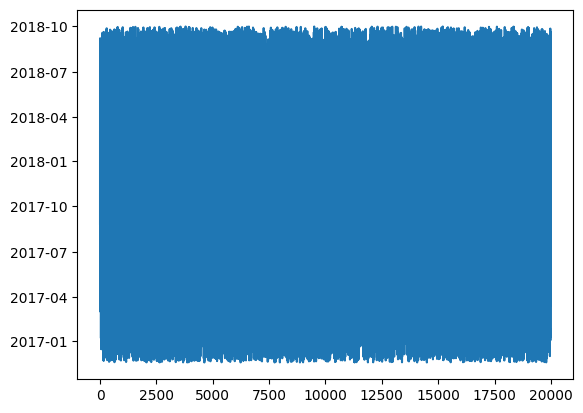

In [250]:
plt.plot(df['date_time']);

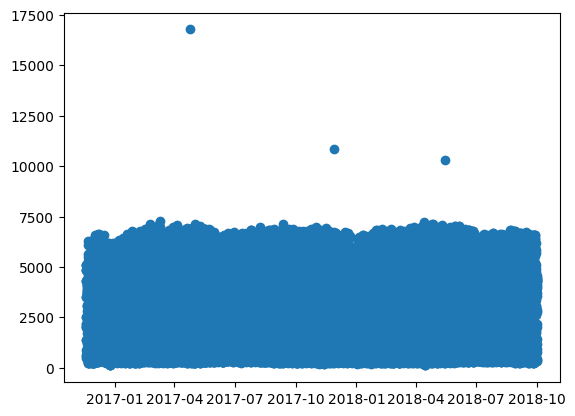

In [291]:
plt.scatter(df['date_time'],df['traffic_volume'])

<Axes: ylabel='date_time'>

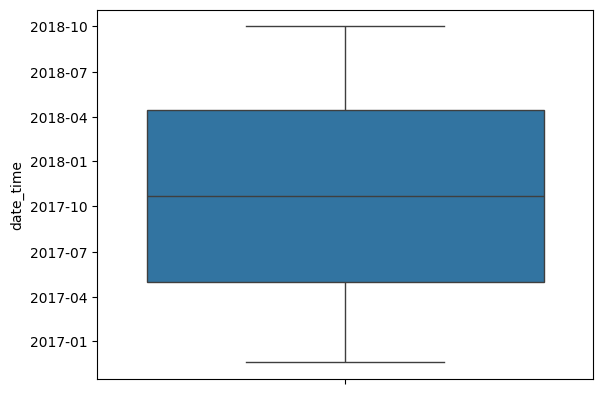

In [252]:
sns.boxplot(df['date_time'])

<Axes: ylabel='traffic_volume'>

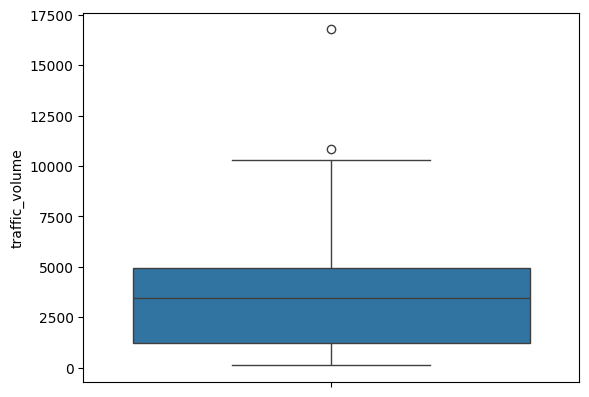

In [253]:
sns.boxplot(df['traffic_volume'])

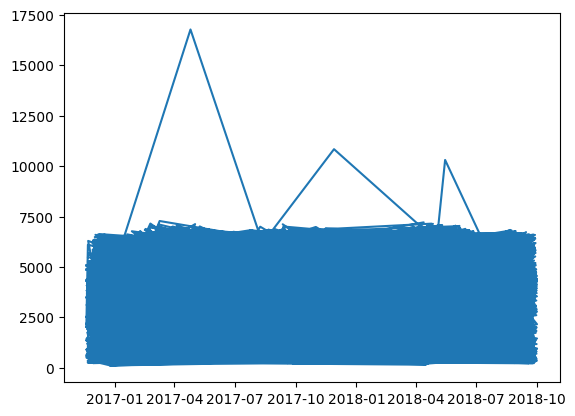

In [254]:
plt.plot(df['date_time'],df['traffic_volume'])

In [255]:
df

,traffic_volume,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time
0,1209.0,291.15,0.0,0.0,90,Mist,mist,2017-08-27 01:00:00
1,1248.0,286.01,0.0,0.0,1,Clear,sky is clear,2018-09-06 23:00:00
2,4602.0,293.69,0.0,0.0,75,Clouds,broken clouds,2017-08-25 18:00:00
3,2838.0,262.35,0.0,0.0,1,Clear,sky is clear,2017-11-09 22:00:00
4,5794.0,267.08,0.0,0.0,5,Clear,sky is clear,2017-11-09 15:00:00
...,...,...,...,...,...,...,...,...
19995,2723.0,296.42,0.0,0.0,40,Clouds,scattered clouds,2018-06-06 21:00:00
19996,5895.0,285.58,0.0,0.0,40,Clouds,scattered clouds,2017-10-25 15:00:00
19997,1132.0,275.30,0.0,0.0,1,Clear,sky is clear,2018-03-28 23:00:00
19998,5525.0,260.94,0.0,0.0,75,Clouds,broken clouds,2018-02-12 15:00:00


In [294]:
df['traffic_volume'].isna().sum()

20

In [295]:
df['traffic_volume'].fillna(method='ffill',inplace=True)

<ipython-input-295-c2b7ba3c79d1>:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['traffic_volume'].fillna(method='ffill',inplace=True)


In [258]:
df.set_index('date_time', inplace=True)
df.sort_index(inplace=True)

In [259]:
df

,traffic_volume,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description
date_time,,,,,,,
2016-11-18 15:00:00,4872.0,274.08,0.0,0.0,90,Snow,heavy snow
2016-11-18 15:00:00,4872.0,274.08,0.0,0.0,90,Fog,fog
2016-11-18 15:00:00,4872.0,274.08,0.0,0.0,90,Mist,mist
2016-11-18 16:00:00,5074.0,273.84,0.0,0.0,90,Fog,fog
2016-11-18 16:00:00,5074.0,273.84,0.0,0.0,90,Mist,mist
...,...,...,...,...,...,...,...
2018-09-30 19:00:00,3543.0,283.45,0.0,0.0,75,Clouds,broken clouds
2018-09-30 20:00:00,2781.0,282.76,0.0,0.0,90,Clouds,overcast clouds
2018-09-30 21:00:00,2159.0,282.73,0.0,0.0,90,Thunderstorm,proximity thunderstorm


In [262]:
result= seasonal_decompose(df['traffic_volume'],model='multiplicative',period=7)

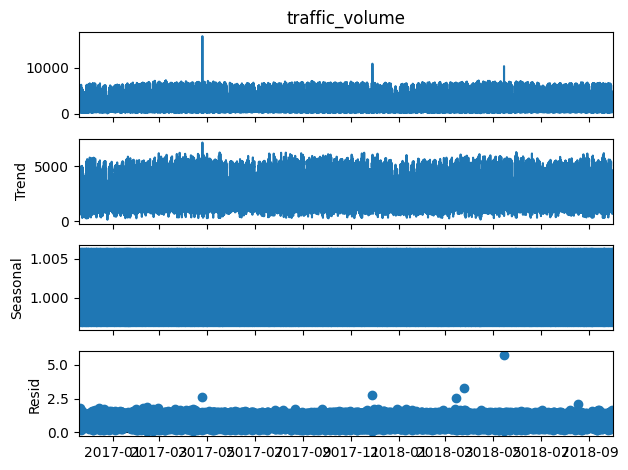

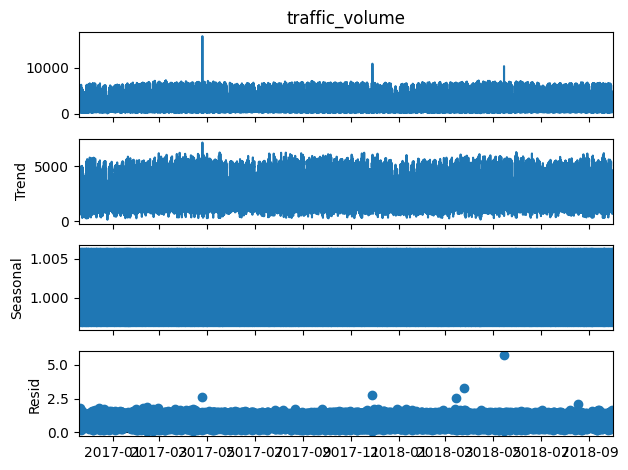

In [263]:
result.plot()

## Data Preprocessing

Clean and preprocess the data.

**Instructions:**
- Handle any missing values in the dataset.
- If necessary, resample the data to ensure consistent time intervals.
- Create any additional features needed, such as lags or moving averages.
- Make sure that the dates are sorted correctly.

Do more if needed!

In [296]:
df.isna().sum()

,0
traffic_volume,0
temp,0
rain_1h,0
snow_1h,0
clouds_all,0
weather_main,0
weather_description,0
date_time,0


In [314]:
df.set_index('date_time', inplace=True)

In [315]:
df.sort_index(inplace=True)

In [297]:
df

,traffic_volume,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time
0,1209.0,291.15,0.0,0.0,90,Mist,mist,2017-08-27 01:00:00
1,1248.0,286.01,0.0,0.0,1,Clear,sky is clear,2018-09-06 23:00:00
2,4602.0,293.69,0.0,0.0,75,Clouds,broken clouds,2017-08-25 18:00:00
3,2838.0,262.35,0.0,0.0,1,Clear,sky is clear,2017-11-09 22:00:00
4,5794.0,267.08,0.0,0.0,5,Clear,sky is clear,2017-11-09 15:00:00
...,...,...,...,...,...,...,...,...
19995,2723.0,296.42,0.0,0.0,40,Clouds,scattered clouds,2018-06-06 21:00:00
19996,5895.0,285.58,0.0,0.0,40,Clouds,scattered clouds,2017-10-25 15:00:00
19997,1132.0,275.30,0.0,0.0,1,Clear,sky is clear,2018-03-28 23:00:00
19998,5525.0,260.94,0.0,0.0,75,Clouds,broken clouds,2018-02-12 15:00:00


## Feature Engineering

### Instructions:
  
- **Shift Method**: Use the `shift` method to create a new column `prev_traffic_volume`, which represents the previous day's traffic volume.

- **Difference between traffic_volume**: Calculate the difference between the values in `traffic_volume` column to highlight short-term volume.

- **Date Features**: Extract meaningful time-based features from the `date_time` column to enhance the model's ability to detect temporal patterns. These features include:
  - **Day of the week**: To capture weekly seasonality.
  - **Month**: To capture monthly trends.
  - **Day of the year**: Useful for modeling yearly seasonality.


In [298]:
df['prev_traffic_volume'] = df['traffic_volume'].shift(1)

In [299]:
df['prev_traffic_volume']

,prev_traffic_volume
0,NaN
1,1209.0
2,1248.0
3,4602.0
4,2838.0
...,...
19995,6601.0
19996,2723.0
19997,5895.0
19998,1132.0


In [300]:
df['prev_traffic_volume'].fillna(method='bfill',inplace=True)

<ipython-input-300-0e569bf968b8>:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['prev_traffic_volume'].fillna(method='bfill',inplace=True)


In [301]:
df['prev_traffic_volume']

,prev_traffic_volume
0,1209.0
1,1209.0
2,1248.0
3,4602.0
4,2838.0
...,...
19995,6601.0
19996,2723.0
19997,5895.0
19998,1132.0


In [302]:
df['difference_traffic']=df['traffic_volume'].diff()

In [303]:
df['difference_traffic']

,difference_traffic
0,NaN
1,39.0
2,3354.0
3,-1764.0
4,2956.0
...,...
19995,-3878.0
19996,3172.0
19997,-4763.0
19998,4393.0


In [304]:
df['difference_traffic'].fillna(method='bfill',inplace=True)

<ipython-input-304-f9159065022c>:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['difference_traffic'].fillna(method='bfill',inplace=True)


In [305]:
df

,traffic_volume,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,prev_traffic_volume,difference_traffic
0,1209.0,291.15,0.0,0.0,90,Mist,mist,2017-08-27 01:00:00,1209.0,39.0
1,1248.0,286.01,0.0,0.0,1,Clear,sky is clear,2018-09-06 23:00:00,1209.0,39.0
2,4602.0,293.69,0.0,0.0,75,Clouds,broken clouds,2017-08-25 18:00:00,1248.0,3354.0
3,2838.0,262.35,0.0,0.0,1,Clear,sky is clear,2017-11-09 22:00:00,4602.0,-1764.0
4,5794.0,267.08,0.0,0.0,5,Clear,sky is clear,2017-11-09 15:00:00,2838.0,2956.0
...,...,...,...,...,...,...,...,...,...,...
19995,2723.0,296.42,0.0,0.0,40,Clouds,scattered clouds,2018-06-06 21:00:00,6601.0,-3878.0
19996,5895.0,285.58,0.0,0.0,40,Clouds,scattered clouds,2017-10-25 15:00:00,2723.0,3172.0
19997,1132.0,275.30,0.0,0.0,1,Clear,sky is clear,2018-03-28 23:00:00,5895.0,-4763.0
19998,5525.0,260.94,0.0,0.0,75,Clouds,broken clouds,2018-02-12 15:00:00,1132.0,4393.0


In [306]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   traffic_volume       20000 non-null  float64       
 1   temp                 20000 non-null  float64       
 2   rain_1h              20000 non-null  float64       
 3   snow_1h              20000 non-null  float64       
 4   clouds_all           20000 non-null  int64         
 5   weather_main         20000 non-null  object        
 6   weather_description  20000 non-null  object        
 7   date_time            20000 non-null  datetime64[ns]
 8   prev_traffic_volume  20000 non-null  float64       
 9   difference_traffic   20000 non-null  float64       
dtypes: datetime64[ns](1), float64(6), int64(1), object(2)
memory usage: 1.5+ MB


In [114]:
df.sort_index(inplace=True)

In [115]:
df

,traffic_volume,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,prev_traffic_volume
0,1209.0,291.15,0.0,0.0,90,Mist,mist,2017-08-27 01:00:00,1209.0
1,1248.0,286.01,0.0,0.0,1,Clear,sky is clear,2018-09-06 23:00:00,1209.0
2,4602.0,293.69,0.0,0.0,75,Clouds,broken clouds,2017-08-25 18:00:00,1248.0
3,2838.0,262.35,0.0,0.0,1,Clear,sky is clear,2017-11-09 22:00:00,4602.0
4,5794.0,267.08,0.0,0.0,5,Clear,sky is clear,2017-11-09 15:00:00,2838.0
...,...,...,...,...,...,...,...,...,...
19995,2723.0,296.42,0.0,0.0,40,Clouds,scattered clouds,2018-06-06 21:00:00,6601.0
19996,5895.0,285.58,0.0,0.0,40,Clouds,scattered clouds,2017-10-25 15:00:00,2723.0
19997,1132.0,275.30,0.0,0.0,1,Clear,sky is clear,2018-03-28 23:00:00,5895.0
19998,5525.0,260.94,0.0,0.0,75,Clouds,broken clouds,2018-02-12 15:00:00,1132.0


In [285]:
df.reset_index()

,date_time,traffic_volume,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,prev_traffic_volume,difference_traffic
0,2016-11-18 15:00:00,4872.0,274.08,0.0,0.0,90,Snow,heavy snow,4872.0,0.0
1,2016-11-18 15:00:00,4872.0,274.08,0.0,0.0,90,Fog,fog,4872.0,0.0
2,2016-11-18 15:00:00,4872.0,274.08,0.0,0.0,90,Mist,mist,4872.0,0.0
3,2016-11-18 16:00:00,5074.0,273.84,0.0,0.0,90,Fog,fog,4872.0,202.0
4,2016-11-18 16:00:00,5074.0,273.84,0.0,0.0,90,Mist,mist,5074.0,0.0
...,...,...,...,...,...,...,...,...,...,...
19995,2018-09-30 19:00:00,3543.0,283.45,0.0,0.0,75,Clouds,broken clouds,3947.0,-404.0
19996,2018-09-30 20:00:00,2781.0,282.76,0.0,0.0,90,Clouds,overcast clouds,3543.0,-762.0
19997,2018-09-30 21:00:00,2159.0,282.73,0.0,0.0,90,Thunderstorm,proximity thunderstorm,2781.0,-622.0
19998,2018-09-30 22:00:00,1450.0,282.09,0.0,0.0,90,Clouds,overcast clouds,2159.0,-709.0


In [281]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 20000 entries, 2016-11-18 15:00:00 to 2018-09-30 23:00:00
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   traffic_volume       20000 non-null  float64
 1   temp                 20000 non-null  float64
 2   rain_1h              20000 non-null  float64
 3   snow_1h              20000 non-null  float64
 4   clouds_all           20000 non-null  int64  
 5   weather_main         20000 non-null  object 
 6   weather_description  20000 non-null  object 
 7   prev_traffic_volume  20000 non-null  float64
 8   difference_traffic   20000 non-null  float64
dtypes: float64(6), int64(1), object(2)
memory usage: 1.5+ MB


In [307]:
df['dayofweek']=df['date_time'].dt.dayofweek

In [308]:
df['month']=df['date_time'].dt.month

In [309]:
df['day_of_year']=df['date_time'].dt.day_of_year

In [310]:
df

,traffic_volume,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,prev_traffic_volume,difference_traffic,dayofweek,month,day_of_year
0,1209.0,291.15,0.0,0.0,90,Mist,mist,2017-08-27 01:00:00,1209.0,39.0,6,8,239
1,1248.0,286.01,0.0,0.0,1,Clear,sky is clear,2018-09-06 23:00:00,1209.0,39.0,3,9,249
2,4602.0,293.69,0.0,0.0,75,Clouds,broken clouds,2017-08-25 18:00:00,1248.0,3354.0,4,8,237
3,2838.0,262.35,0.0,0.0,1,Clear,sky is clear,2017-11-09 22:00:00,4602.0,-1764.0,3,11,313
4,5794.0,267.08,0.0,0.0,5,Clear,sky is clear,2017-11-09 15:00:00,2838.0,2956.0,3,11,313
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,2723.0,296.42,0.0,0.0,40,Clouds,scattered clouds,2018-06-06 21:00:00,6601.0,-3878.0,2,6,157
19996,5895.0,285.58,0.0,0.0,40,Clouds,scattered clouds,2017-10-25 15:00:00,2723.0,3172.0,2,10,298
19997,1132.0,275.30,0.0,0.0,1,Clear,sky is clear,2018-03-28 23:00:00,5895.0,-4763.0,2,3,87
19998,5525.0,260.94,0.0,0.0,75,Clouds,broken clouds,2018-02-12 15:00:00,1132.0,4393.0,0,2,43


In [125]:
# encod =LabelEncoder()
#df['weather_main']= encod.fit_transform(df['weather_main'])

array([5, 0, 1, ..., 0, 1, 1])

In [316]:
df

,traffic_volume,temp,rain_1h,snow_1h,clouds_all,prev_traffic_volume,difference_traffic,dayofweek,month,day_of_year
date_time,,,,,,,,,,
2016-11-18 15:00:00,4872.0,274.08,0.0,0.0,90,3403.0,1469.0,4,11,323
2016-11-18 15:00:00,4872.0,274.08,0.0,0.0,90,3253.0,1619.0,4,11,323
2016-11-18 15:00:00,4872.0,274.08,0.0,0.0,90,6038.0,-1166.0,4,11,323
2016-11-18 16:00:00,5074.0,273.84,0.0,0.0,90,2453.0,2621.0,4,11,323
2016-11-18 16:00:00,5074.0,273.84,0.0,0.0,90,3071.0,2003.0,4,11,323
...,...,...,...,...,...,...,...,...,...,...
2018-09-30 19:00:00,3543.0,283.45,0.0,0.0,75,4457.0,-914.0,6,9,273
2018-09-30 20:00:00,2781.0,282.76,0.0,0.0,90,519.0,2262.0,6,9,273
2018-09-30 21:00:00,2159.0,282.73,0.0,0.0,90,6146.0,-3987.0,6,9,273


In [312]:
df.drop(columns='weather_description',inplace=True)

In [313]:
df.drop(columns='weather_main',inplace=True)

In [317]:
df

,traffic_volume,temp,rain_1h,snow_1h,clouds_all,prev_traffic_volume,difference_traffic,dayofweek,month,day_of_year
date_time,,,,,,,,,,
2016-11-18 15:00:00,4872.0,274.08,0.0,0.0,90,3403.0,1469.0,4,11,323
2016-11-18 15:00:00,4872.0,274.08,0.0,0.0,90,3253.0,1619.0,4,11,323
2016-11-18 15:00:00,4872.0,274.08,0.0,0.0,90,6038.0,-1166.0,4,11,323
2016-11-18 16:00:00,5074.0,273.84,0.0,0.0,90,2453.0,2621.0,4,11,323
2016-11-18 16:00:00,5074.0,273.84,0.0,0.0,90,3071.0,2003.0,4,11,323
...,...,...,...,...,...,...,...,...,...,...
2018-09-30 19:00:00,3543.0,283.45,0.0,0.0,75,4457.0,-914.0,6,9,273
2018-09-30 20:00:00,2781.0,282.76,0.0,0.0,90,519.0,2262.0,6,9,273
2018-09-30 21:00:00,2159.0,282.73,0.0,0.0,90,6146.0,-3987.0,6,9,273


## Train-Test Split

Split the dataset into training and testing sets.

**Instructions:**
- Ensure the split maintains the time order of the data.
- Decide on an appropriate ratio for splitting the data.

In [318]:
train,test=train_test_split(df,test_size=0.2,random_state=42)

In [319]:
train.shape

(16000, 10)

In [320]:
test.shape

(4000, 10)

## Feature Scaling

Apply feature scaling to the data if needed.

**Instructions:**
- Use a scaling method such as MinMaxScaler or StandardScaler.
- Ensure scaling is applied correctly to both training and testing data.

In [321]:
scale=MinMaxScaler()
train_scale=scale.fit_transform(train)
test_scale=scale.transform(test)

In [322]:
train_scale

array([[0.01163907, 0.63632274, 0.        , ..., 0.        , 0.36363636,
        0.40547945],
       [0.01427886, 0.35527894, 0.        , ..., 0.33333333, 0.18181818,
        0.21917808],
       [0.19606431, 0.84583083, 0.        , ..., 0.5       , 0.72727273,
        0.70136986],
       ...,
       [0.18940485, 0.77639472, 0.        , ..., 0.83333333, 0.36363636,
        0.36164384],
       [0.29433645, 0.18836233, 0.        , ..., 0.        , 1.        ,
        0.94794521],
       [0.31257499, 0.59928014, 0.        , ..., 0.66666667, 0.36363636,
        0.35616438]])

In [323]:
test_scale

array([[0.03665707, 0.39277145, 0.        , ..., 1.        , 0.90909091,
        0.8630137 ],
       [0.03161747, 0.47810438, 0.        , ..., 0.66666667, 0.        ,
        0.05205479],
       [0.26991841, 0.85572885, 0.        , ..., 1.        , 0.72727273,
        0.67123288],
       ...,
       [0.0987521 , 0.70320936, 0.        , ..., 0.83333333, 0.81818182,
        0.80273973],
       [0.18442525, 0.39742052, 0.        , ..., 1.        , 0.        ,
        0.03835616],
       [0.40544756, 0.43566287, 0.        , ..., 0.33333333, 0.27272727,
        0.29315068]])

In [324]:
train_scale.shape

(16000, 10)

In [325]:
test_scale.shape

(4000, 10)

In [352]:
def create_dataset(data,look_back=1):
  dataX=[]
  datay=[]

  for i in range(len(data)-look_back-1):
    a=data[i:(i+look_back),0]
    dataX.append(a)
    b=data[i+look_back,0]
    datay.append(b)
  return np.array(dataX),np.array(datay)


In [364]:
X_train,y_train=create_dataset(train_scale,1)
X_test,y_test=create_dataset(test_scale,1)

In [365]:
X_train.shape

(15998, 1)

In [366]:
y_train.shape

(15998,)

In [367]:
X_test.shape

(3998, 1)

In [368]:
X_train=np.reshape(X_train,(X_train.shape[0],1,X_train.shape[1]))


In [369]:
X_train.shape

(15998, 1, 1)

In [370]:
X_test=np.reshape(X_test,(X_test.shape[0],1,X_test.shape[1]))

In [371]:
X_test.shape

(3998, 1, 1)

## Models Selection

Choose two models for time series forecasting.

**Instructions:**
- Select two models such as ARIMA, SARIMA, RNN, LSTM, or GRU.
- Train these models and then compare their performance.

In [ ]:
# LSTM

### Model 1 Training

Train your first model on the training dataset.

**Instructions:**
- Fit the first model to the training data.
- Ensure to monitor the training process.

In [372]:
model=Sequential()
model.add(LSTM(16,return_sequences=True,input_shape=(X_train.shape[1],1)))
model.add(LSTM(32))
model.add(Dropout(0.2))

model.add(Dense(1))


In [373]:
model.summary()

Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_14 (LSTM)                       │ (None, 1, 16)               │           1,152 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_15 (LSTM)                       │ (None, 32)                  │           6,272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_9 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,457 (29.13 KB)

 Trainable params: 7,457 (29.13 KB)

 Non-trainable params: 0 (0.00 B)

In [374]:
model.compile(loss='mean_squared_error',optimizer='adam')

In [375]:
model.fit(X_train,y_train,epochs=10,batch_size=32)

Epoch 1/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - loss: 0.0199
Epoch 2/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.0141
Epoch 3/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.0142
Epoch 4/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.0141
Epoch 5/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.0141
Epoch 6/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 0.0143
Epoch 7/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0142
Epoch 8/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.0140
Epoch 9/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.0142
Epoch 10/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.0139


### Make 1 Predictions

Generate predictions on the test dataset.

### Instructions:
- Use the trained model to make predictions on the test data.
- Store the predictions for further analysis.

In [377]:
predict=model.predict(X_test)

125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step


### Model 1 Evaluation

Evaluate the performance of your first model on the test dataset.

**Instructions:**
- Calculate evaluation metrics such as MAE, MSE, RMSE, or MAPE.
- Plot the predicted vs actual values for the test set.
- Plot the loss and the validation loss.

In [378]:
mean_squar=mean_squared_error(y_test,predict)
mean_squar

0.014120089074946301

In [379]:
mean_abs=mean_absolute_error(y_test,predict)
mean_abs

0.10419617498186695

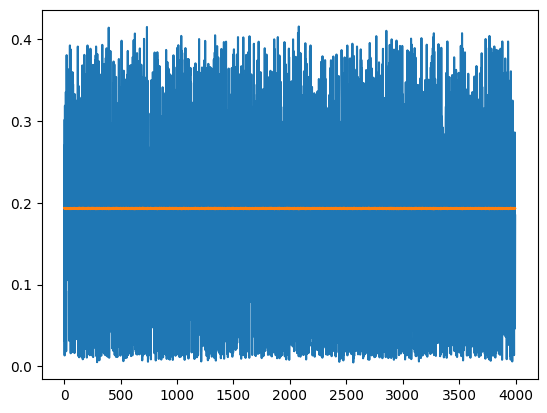

In [380]:
plt.plot(y_test)
plt.plot(predict)

### Model 2 Training

Train your second model on the training dataset.

**Instructions:**
- Fit the second model to the training data.
- Ensure to monitor the training process.

GRU

In [399]:
model2=Sequential()
model2.add(GRU(32,return_sequences=True,input_shape=(X_train.shape[1],1)))
model2.add(GRU(16))
model2.add(Dropout(0.2))

model2.add(Dense(1))

In [400]:
model2.summary()

Model: "sequential_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ gru_10 (GRU)                         │ (None, 1, 32)               │           3,360 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ gru_11 (GRU)                         │ (None, 16)                  │           2,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_11 (Dropout)                 │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 5,777 (22.57 KB)

 Trainable params: 5,777 (22.57 KB)

 Non-trainable params: 0 (0.00 B)

In [401]:
model2.compile(loss='mean_squared_error',optimizer='adam')

In [415]:
model2.fit(X_train,y_train,epochs=10,batch_size=32)

Epoch 1/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.0140
Epoch 2/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.0140
Epoch 3/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.0142
Epoch 4/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.0141
Epoch 5/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0140
Epoch 6/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.0140
Epoch 7/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.0141
Epoch 8/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.0140
Epoch 9/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.0141
Epoch 10/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.0140


### Make 2 Predictions

Generate predictions on the test dataset.

### Instructions:
- Use the trained model to make predictions on the test data.
- Store the predictions for further analysis.

In [403]:
pridect2=model2.predict(X_test)

125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step


### Model 2 Evaluation

Evaluate the performance of your second model on the test dataset.

**Instructions:**
- Calculate evaluation metrics such as MAE, MSE, RMSE, or MAPE.
- Plot the predicted vs actual values for the test set.
- Plot the loss and the validation loss.

In [404]:
mean_squar2=mean_squared_error(y_test,pridect2)
mean_squar2

0.014155482753325017

In [405]:
mean_aps2=mean_absolute_error(y_test,pridect2)
mean_aps2

0.10461477801986004

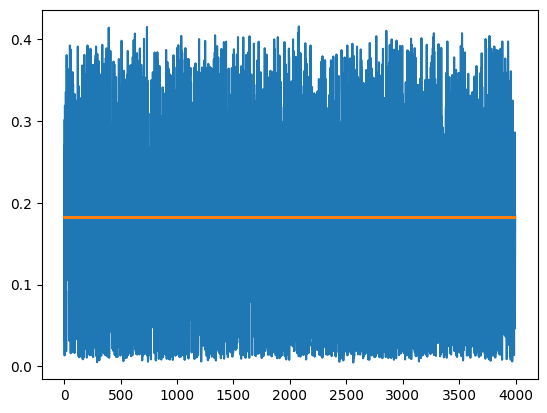

In [388]:
plt.plot(y_test)
plt.plot(pridect2)

## Project Questions:

1. **Data Preprocessing**: Explain why you chose your specific data preprocessing techniques (e.g., normalization, handling missing values). How did these techniques help prepare the data for training the model?
تجهيز البانات مهم للموديل لازم نهتم في القيم المفقوده و الاوت لاير والقيم المتكرره و حذفت القيم المتكرره
بنسبه للقيم المفقوده في التارقت خليتها تاخذ القيم باستخدام fill(method='ffill')   
2. **Feature Engineering**: Did you perform any feature engineering or transformations? Describe your decisions and how these new features (or transformed features) contributed to the forecasting model.
لقت رجعت الdate
لشكله الاساسي عشان اخذ منه الشهر و الايام للاسابيع و الايام في السنه
كمان استخدممت diff() عشان اعرف الفروقات  في التارقت
و عملت عامود جديد باخذ البيانات من التارقت و تعبيه القيمه الفاضيه له و حذفت العمده الي ما ابغاها
3. **Model Architecture**: Describe the reasoning behind your model’s architecture (e.g., the type of model, layers, number of neurons, and activation functions). Why did you believe this architecture was appropriate for time series forecasting?
بعد ما قسمت الداتا و فصلت القيم في
dataX ,datay وقسمتها و
, look_backيكون =1
استخدمت نوعين من موديل LSTM , GRU
لاباس التعامل مع الاوت لايد فيهم
سويت لكل واحد 2 من اللايرز بنسبه LSTM  كانت الاولى لير رح  16 و يرجع مره ثانيه للير اما بنسبه للير 2 كانت 32 و عملت بعدها دروب عشان اخخفف منها
اخر شىء الاوت بوت
اما نسبه لل GRU  كنات الاولى للانبوت وعطبيته قيمه 32 و يرجع مره ثانيه في اللير و بعها عطيته 16 و قللتها بعدها باستخدام الدروب و بعهدها الاوت بوت   

4. **Training Process**: Discuss why you chose your batch size, number of epochs, and optimizer. How did these choices affect the training process? Did you experiment with different values, and what were the outcomes? البنش سايس 32 كان تجربه رقم للعدد ال epochs  10
5. **Loss Function and Metrics**: Why did you choose the specific loss function and evaluation metrics (e.g., MAE, RMSE, MAPE)? How do they align with the objective of forecasting?
6. **Model Tuning (If Done)**: Describe any tuning you performed (e.g., hyperparameter tuning) and why you felt it was necessary. How did these adjustments improve model performance?
7. **Overfitting and Underfitting**: Analyze whether the model encountered any overfitting or underfitting during training. What strategies could you implement to mitigate these issues?   فيه اوفر فيتنق حاولت اعالجه بس ما عرفت
8. **Future Improvements**: Suggest potential improvements or further steps you could take to enhance model performance. Consider using different algorithms, feature engineering techniques, or tuning hyperparameters.

### Answer Here: